# Capstone Project 1: EDA - Inferential Statistics

**In the following EDA, I try to perfom analyze correlation between Number of Ratings and Average of Ratings for each movie.** 

# Importing Libraries and Loading Our Data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

movies = pd.read_csv('Dataset/movies.dat', sep = '::', engine='python',
                     names=['MovieID','Title','Genres'],index_col ='MovieID' )
users = pd.read_csv('Dataset/users.dat', sep = '::', engine='python',
                     names=['UserID','Gender','Age','Occupation','Zip-code'],index_col ='UserID' )
ratings = pd.read_csv('Dataset/ratings.dat', sep = '::', engine='python',
                     names=['UserID','MovieID','Rating','Timestamp'])#,index_col =['UserID','MovieID'] )

In [2]:
users_ratings_df = pd.merge(users,ratings,how='inner',on='UserID')
users_ratings_movies_df = pd.merge(users_ratings_df,movies,how='inner',on='MovieID')
users_ratings_movies_df = users_ratings_movies_df[['UserID','Gender','Age','Occupation','Rating','MovieID','Title','Timestamp']]

# Seperate all genre to movie_genres_df dataframe
movie_genres_df = pd.DataFrame(columns=['MovieID','Genre'])
for index,movie in movies.iterrows():
    for genre in movie['Genres'].split('|'):
        movie_genres_df = movie_genres_df.append({'MovieID' : index , 'Genre': genre},ignore_index=True)

        #show how many movie on each genre      
#movie_genres_df.groupby('Genre').count()

age_group_dict = { 1:  "Under 18",18:  "18-24",25:  "25-34",35:  "35-44",45:  "45-49",50:  "50-55",56:  "56+"}

occupation_dict = {  0:  "other or not specified",1:  "academic/educator",2:  "artist",3:  "clerical/admin",
                   4:  "college/grad student",5:  "customer service",6:  "doctor/health care",7:  "executive/managerial",
                   8:  "farmer",9:  "homemaker",10:  "K-12 student",11:  "lawyer",12:  "programmer",13:  "retired",
                   14:  "sales/marketing",15:  "scientist",16:  "self-employed",17:  "technician/engineer",
                   18:  "tradesman/craftsman",19:  "unemployed",20:  "writer"}

users_ratings_movies_df['Age'] = users_ratings_movies_df['Age'].map(age_group_dict)
users_ratings_movies_df['Occupation'] = users_ratings_movies_df['Occupation'].map(occupation_dict)

#Extract just year from timestamp column
users_ratings_movies_df=users_ratings_movies_df.rename(columns = {'Timestamp':'Year'})
users_ratings_movies_df['Year'] = [datetime.fromtimestamp(timestamp).year for timestamp in users_ratings_movies_df['Year'] ] 


users_ratings_movies_df_separated_genre = pd.merge(users_ratings_movies_df,movie_genres_df,how='inner',on='MovieID')
users_ratings_movies_df = pd.merge(users_ratings_movies_df,movies[['Genres']],how='inner',on='MovieID')

In [11]:
count_mean_rating_df = users_ratings_movies_df.groupby(['Title'])['Title','Rating']
count_mean_rating_df = count_mean_rating_df.agg({'count','mean'})
count_mean_rating_df.columns = ['Number of Rating', 'Average of Rating']
count_mean_rating_df = count_mean_rating_df.sort_values(['Number of Rating', 'Average of Rating'],ascending=False).reset_index()
count_mean_rating_df.head()

,Title,Number of Rating,Average of Rating
0,American Beauty (1999),3428,4.317386
1,Star Wars: Episode IV - A New Hope (1977),2991,4.453694
2,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977
3,Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893
4,Jurassic Park (1993),2672,3.763847


# **Initial observations for Correlation between Number of Ratings and Average of Ratings**

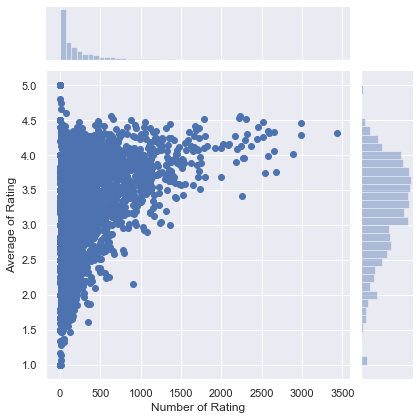

In [16]:
x = count_mean_rating_df['Number of Rating']
y = count_mean_rating_df['Average of Rating']
sns.jointplot(x, y)

In [20]:
# Compute the covariance matrix: covariance_matrix

covariance_matrix = np.cov(x,y)
# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = (covariance_matrix[0,1],covariance_matrix[1,0])

# Print the length/width covariance
print(petal_cov)

[[1.47492742e+05 9.25084733e+01]
 [9.25084733e+01 4.52827711e-01]]
(92.50847331280045, 92.50847331280045)


**The coefficient is positive means one variable tends to increase, the value of the other variable increases but need more analysis**

In [21]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    
    corr_mat= np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [22]:
r = pearson_r(x,y)
# Print the result
print(r)

0.35795603728670733


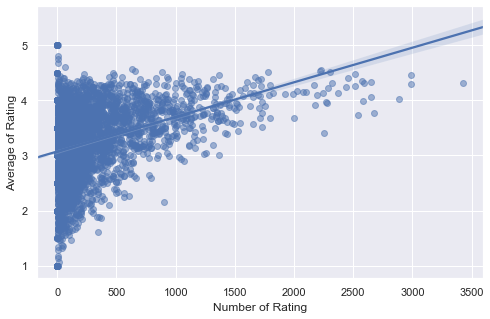

In [23]:
sns.set(rc={'figure.figsize':(18,8)})
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x,y,scatter_kws={'alpha':0.5})

**Pearson correlation coefficient is 0.35, not equal zero and positive, which means when number of ratings increases, Average of Ratings increase, but the correlation is pretty weak.**

# Setup hypothesis test
 
 **Ho : The Average of Ratings and Number of Ratings are independent**

 **Ha : The Average of Ratings and Number of Ratings are correlated**
 
 **Statistical significance for  𝛼  = 0.01**
 
  **Test Statistic: Pearson correlation coefficient**

**Permutation Test on Data**

<p>To do so, permute the Number of Ratings but leave the Average of Ratings values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.</p>

In [24]:
# Compute observed correlation: r_obs
r_obs = pearson_r(x,y)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    number_discharged_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(number_discharged_permuted,y)

# Compute p-value: p
p = np.sum(np.abs(perm_replicates)>=np.abs(r_obs))/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


In [25]:
alpha = 0.01
if p < alpha:
    print('p-value is less than 0.01.')
else:
    print('p-value is equal or more than than 0.01.')

p-value is less than 0.01.


**As p-value less than $\alpha$, we can reject the null hypothesis and accept alternative hypothesis which means that there is a correlation between number of ratings and average of ratings.**

**Use statistic method from Scipy.stats**

In [47]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(x, y)
correlation, p_value 

(0.35795603728670733, 1.8933671723697276e-112)

**p-value is statistically significant and reject the null hypothesis**

In [88]:
genre_year_popular_movies_df = users_ratings_movies_df_separated_genre.groupby(['Genre'])['Rating']

genre_year_popular_movies_df = genre_year_popular_movies_df.agg({'count','mean'})
genre_year_popular_movies_df.columns = ['Number of Rating', 'Average of Rating']
genre_year_popular_movies_df = genre_year_popular_movies_df.sort_values(['Number of Rating', 'Average of Rating'],ascending=False)
genre_year_popular_movies_df.head(3)

,Number of Rating,Average of Rating
Genre,,
Comedy,356580,3.522099
Drama,354529,3.766332
Action,257457,3.491185


# Now Analyzing Correlation between two variables(Number of Ratings,Average of Rating) for three most popular genre(Comedy,Drama,Action)

# Analyze correlation between Number of Ratings and Average of Ratings for Genre 'Comedy'

In [65]:
comedy_count_mean_rating_df = users_ratings_movies_df_separated_genre[users_ratings_movies_df_separated_genre.Genre == 'Comedy']
comedy_count_mean_rating_df = comedy_count_mean_rating_df.groupby(['Title'])['Title','Rating']
comedy_count_mean_rating_df = comedy_count_mean_rating_df.agg({'count','mean'})
comedy_count_mean_rating_df.columns = ['Number of Rating', 'Average of Rating']
comedy_count_mean_rating_df = comedy_count_mean_rating_df.sort_values(['Number of Rating', 'Average of Rating'],ascending=False).reset_index()
comedy_count_mean_rating_df.head()

,Title,Number of Rating,Average of Rating
0,American Beauty (1999),3428,4.317386
1,Back to the Future (1985),2583,3.990321
2,Men in Black (1997),2538,3.739953
3,Shakespeare in Love (1998),2369,4.127480
4,"Princess Bride, The (1987)",2318,4.303710


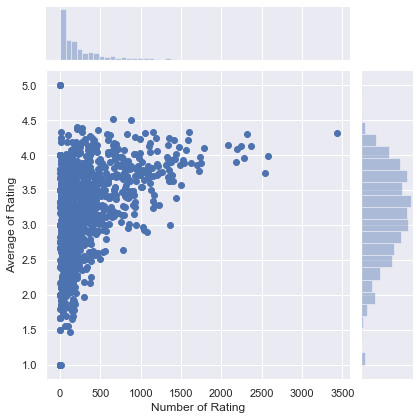

In [71]:
x_comedy = comedy_count_mean_rating_df['Number of Rating']
y_comedy = comedy_count_mean_rating_df['Average of Rating']
sns.jointplot(x_comedy, y_comedy)

In [72]:
correlation, p_value = pearsonr(x_comedy, y_comedy)
correlation, p_value 

(0.42660679567217813, 1.2390245571333917e-52)

In [80]:
alpha = 0.01
if p < alpha:
    print('p-value is less than 0.01.')
else:
    print('p-value is equal or more than than 0.01.')

p-value is less than 0.01.


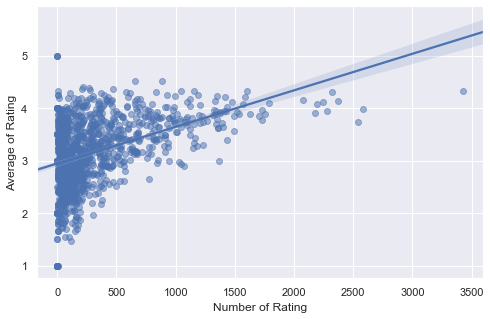

In [83]:
sns.set(rc={'figure.figsize':(18,8)})
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x_comedy,y_comedy,scatter_kws={'alpha':0.5})

# Analyze correlation between Number of Ratings and Average of Ratings for Genre 'Drama'

In [73]:
drama_count_mean_rating_df = users_ratings_movies_df_separated_genre[users_ratings_movies_df_separated_genre.Genre == 'Drama']
drama_count_mean_rating_df = drama_count_mean_rating_df.groupby(['Title'])['Title','Rating']
drama_count_mean_rating_df = drama_count_mean_rating_df.agg({'count','mean'})
drama_count_mean_rating_df.columns = ['Number of Rating', 'Average of Rating']
drama_count_mean_rating_df = drama_count_mean_rating_df.sort_values(['Number of Rating', 'Average of Rating'],ascending=False).reset_index()
drama_count_mean_rating_df.head()

,Title,Number of Rating,Average of Rating
0,American Beauty (1999),3428,4.317386
1,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977
2,Saving Private Ryan (1998),2653,4.337354
3,"Silence of the Lambs, The (1991)",2578,4.351823
4,Fargo (1996),2513,4.254676


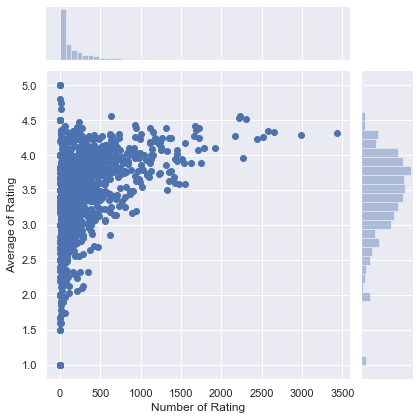

In [89]:
x_drama = drama_count_mean_rating_df['Number of Rating']
y_drama = drama_count_mean_rating_df['Average of Rating']
sns.jointplot(x_drama, y_drama)

In [75]:
correlation, p_value = pearsonr(x_drama, y_drama)
correlation, p_value 

(0.3695997245276268, 1.5494327105091322e-49)

In [81]:
alpha = 0.01
if p < alpha:
    print('p-value is less than 0.01.')
else:
    print('p-value is equal or more than than 0.01.')

p-value is less than 0.01.


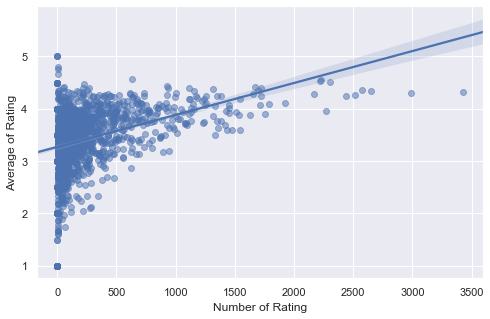

In [84]:
sns.set(rc={'figure.figsize':(18,8)})
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x_drama,y_drama,scatter_kws={'alpha':0.5})

# Analyze correlation between Number of Ratings and Average of Ratings for Genre 'Action'

In [77]:
action_count_mean_rating_df = users_ratings_movies_df_separated_genre[users_ratings_movies_df_separated_genre.Genre == 'Action']
action_count_mean_rating_df = action_count_mean_rating_df.groupby(['Title'])['Title','Rating']
action_count_mean_rating_df = action_count_mean_rating_df.agg({'count','mean'})
action_count_mean_rating_df.columns = ['Number of Rating', 'Average of Rating']
action_count_mean_rating_df = action_count_mean_rating_df.sort_values(['Number of Rating', 'Average of Rating'],ascending=False).reset_index()
action_count_mean_rating_df.head()

,Title,Number of Rating,Average of Rating
0,Star Wars: Episode IV - A New Hope (1977),2991,4.453694
1,Star Wars: Episode V - The Empire Strikes Back...,2990,4.292977
2,Star Wars: Episode VI - Return of the Jedi (1983),2883,4.022893
3,Jurassic Park (1993),2672,3.763847
4,Saving Private Ryan (1998),2653,4.337354


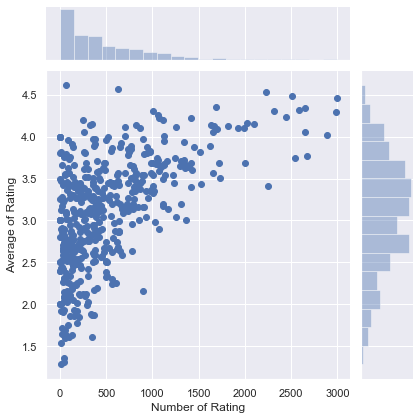

In [78]:
x_action = action_count_mean_rating_df['Number of Rating']
y_action = action_count_mean_rating_df['Average of Rating']
sns.jointplot(x_action, y_action)

In [79]:
correlation, p_value = pearsonr(x_action, y_action)
correlation, p_value 

(0.5675723432725359, 1.4987117578166508e-43)

In [82]:
alpha = 0.01
if p < alpha:
    print('p-value is less than 0.01.')
else:
    print('p-value is equal or more than than 0.01.')

p-value is less than 0.01.


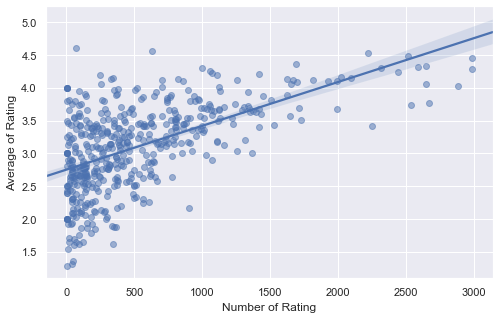

In [85]:
sns.set(rc={'figure.figsize':(18,8)})
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x_action,y_action,scatter_kws={'alpha':0.5})

# Conclusion

**Generally there is weak correlation between Number of Ratings and Average of Ratings for each movie in all genres with a very small p-value  and less than $\alpha$ = .01, and small positive correlation between number of ratings and average of ratings with pearson_r 0.36.**

**After analyze correlation between Number of Ratings and Average of Ratings for 3 populare genres: Comedy, Drama and Action, turns out correlation between these two variable for genre *Action* is stronger than the other two genres.**

**pearson_r for genre 'Comedy' =  0.43**

**pearson_r for genre 'Drama' =  0.37**

**pearson_r for genre 'Action' =  0.57**
